In [53]:
import pandas as pd
import numpy as np
from IPython.display import display
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
from matplotlib import cm
import math
from datetime import datetime
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

%config InlineBackend.figure_formats = {'png', 'retina'}

In [6]:
# always display all columns in the dataframe 
pd.options.display.max_columns = None

In [227]:
df_mrc = pd.read_csv('mrc_projects.csv')
df_mrc.head()

,Ref No.,Title of project,Commercial Potential,Start Date,Contractual End Date,Contract signed,Year Contract signed,Extension to,Duration (months),ActualStart,ActualEnd,Actual Project Duration (months),Pre-Incubation Phase,Incubation Phase,Acceleration Phase,Status,Scheme,Thematic Classification,Principal Investigator,Gender,Age,Qualification,Institution,Collaborating Cloud Computing/HPC Service Provider,Academic/Research Institution(s),Other Collaborators,Collaborating Accredited Incubator,MRC Officer in charge,Date Milestone 1,Milestone 1 - Activities,Milestone 1 MRC Funding,Milestone 1 In Cash,Milestone 1 In Kind,Milestone 1 Total,Date Milestone 2,Milestone 2 - Activities,Milestone 2 MRC Funding,Milestone 2 In Cash,Milestone 2 In Kind,Milestone 2 Total,Date Milestone 3,Milestone 3 - Activities,Milestone 3 MRC Funding,Milestone 3 In Cash,Milestone 3 In Kind,Milestone 3 Total,Date Milestone 4,Milestone 4 - Activities,Milestone 4 MRC Funding,Milestone 4 In Cash,Milestone 4 In Kind,Milestone 4 Total,Date Milestone 5,Milestone 5 - Activities,Milestone 5 MRC Funding,Milestone 5 In Cash,Milestone 5 In Kind,Milestone 5 Total,Date Milestone 6,Milestone 6 - Activities,Milestone 6 MRC Funding,Milestone 6 In Cash,Milestone 6 In Kind,Milestone 6 Total,Date Milestone 7,Milestone 7 - Activities,Milestone 7 MRC Funding,Milestone 7 In Cash,Milestone 7 In Kind,Milestone 7 Total,Date Milestone 8,Milestone 8 - Activities,Milestone 8 MRC Funding,Milestone 8 In Cash,Milestone 8 In Kind,Milestone 8 Total,Date Milestone 9,Milestone 9 - Activities,Milestone 9 MRC Funding,Milestone 9 In Cash,Milestone 9 In Kind,Milestone 9 Total,Date Milestone 10,Milestone 10 - Activities,Milestone 10 MRC Funding,Milestone 10 In Cash,Milestone 10 In Kind,Milestone 10 Total,Date Milestone 11,Milestone 11 - Activities,Milestone 11 MRC Funding,Milestone 11 In Cash,Milestone 11 In Kind,Milestone 11 Total,Date Milestone 12,Milestone 12 - Activities,Milestone 12 MRC Funding,Milestone 12 In Cash,Milestone 12 In Kind,Milestone 12 Total,1st Progress due,1st Progress delayed by (months),1st Progress received,2nd Progress due,2nd Progress delayed by (months),2nd Progress received,3rd Progress due,3rd Progress delayed by (months),3rd Progress received,4th Progress due,4th Progress delayed by (months),4th Progress received,5th Progress due,5th Progress delayed by (months),5th Progress received,6th Progress due,6th Progress delayed by (months),6th Progress received,7th Progress due,7th Progress delayed by (months),7th Progress received,8th Progress due,8th Progress delayed by (months),8th Progress received,9th Progress due,9th Progress delayed by (months),9th Progress received,10th Progress due,10th Progress delayed by (months),10th Progress received,Final Report Due on,Final Report delayed by (months),Final Report received on,PR1 - 1st Reminder,PR1 - 2nd Reminder,PR1 - 3rd Reminder,PR2 - 1st Reminder,PR2 - 2nd Reminder,PR2 - 3rd Reminder,PR3 - 1st Reminder,PR3 - 2nd Reminder,PR3 - 3rd Reminder,PR4 - 1st Reminder,PR4 - 2nd Reminder,PR4 - 3rd Reminder,PR5 - 1st Reminder,PR5 - 2nd Reminder,PR5 - 3rd Reminder,FR - 1st Reminder,FR - 2nd Reminder,FR - 3rd Reminder,Final Reminder,Termination Letter,Year Completed,1st Payment,2nd Payment,3rd Payment,4th Payment,5th Payment,Amount Requested from MRC,Amount brought in by Applicant - In Cash,Amount brought in by Applicant - In Kind,Funding by MRC (50%)/Rs Pre-Inc,Funding by MRC (50%)/Rs Inc,Funding by MRC (50%)/Rs Acc,NSIS Total funding by MRC (50%)/Rs,Funding provided by Incubator/Incubatee (Rs) Pre-Inc,Funding provided by Incubator/Incubatee (Rs) Inc,Funding provided by Incubator/Incubatee (Rs) Acc,Funding provided by Incubator/Incubatee (Rs),Project Value (Rs) Pre-Inc,Project Value (Rs) Inc,Project Value (Rs) Acc,Total Project Value,Total Amount Disbursed,Total Committed Balance,Reallocation (Rs),Dissemination,Next Monitoring Date,Comments,Areas Covered,Materials,Brief Description of Project,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unname

In [420]:
df_mrc = pd.read_csv('mrc_projects.csv')
df_mrc

# dropping all rows without data 
df_mrc.dropna(axis = 0, how = 'all', inplace = True)
# if more than 50% of columns have no value, drop that column 
df_mrc.dropna(thresh=len(df_mrc) - 400, axis = 1, inplace = True)

df_mrc.fillna('NA' , inplace = True)

df_mrc
df_mrc.to_pickle('df_mrc.pkl')

In [376]:
# turning cols to date, help from Sandeep
def try_parsing_date(text):
    for fmt in ('%b-%d', '%d-%b-%y', '%d.%m.%y',' %d.%m.%y', '%d/%m/%y','%B %Y', '%b %Y', '%b-%y', '%Y'):
        try:
            return datetime.strptime(text, fmt)
        except ValueError:
            pass
    #raise ValueError('no valid date format found', text)

def col_to_date(column):
    indexColumn = 0
    for eachDate  in column:
        if (type(eachDate) == str and len(eachDate) > 2):
            new_date = try_parsing_date(eachDate)
            column.replace(column[indexColumn], new_date, inplace = True)
        indexColumn = indexColumn + 1
    return



In [382]:
col_to_date(df_mrc['Start Date'])
col_to_date(df_mrc['Contractual End Date'])
#col_to_date(df_mrc['Year Contract signed'])
col_to_date(df_mrc['ActualStart'])
col_to_date(df_mrc['ActualEnd'])
df_mrc

,Ref No.,Title of project,Commercial Potential,Start Date,Contractual End Date,Year Contract signed,Duration (months),ActualStart,ActualEnd,Status,Scheme,Thematic Classification,Principal Investigator,Gender,Institution,MRC Officer in charge,Total Project Value,Total Amount Disbursed,Brief Description of Project
0,NA,Pre feasibility study on Sea water Nasal spray...,FALSE,NA,2012-01-01 00:00:00,2011/2011,NA,2011-07-18 00:00:00,2011-09-12 00:00:00,Completed,SRGS,Ocean Technology and Marine Resources,MRC,NA,MRC,NA,NA,-,NA
1,NA,Solar Concentrators and Desalinated Water,FALSE,NA,2012-01-01 00:00:00,2003/2004,NA,2004-03-01 00:00:00,2008-03-21 00:00:00,Completed,SRGS,Energy efficiency and Renewable Energy,MRC,NA,MRC,NA,"2,674",0,"It is only part of RSO-STE1, Technical committ..."
2,-,Feasibility Study on Seaweed,FALSE,NA,2012-01-01 00:00:00,2005/2006,NA,2006-02-24 00:00:00,2008-04-01 00:00:00,Completed,SRGS,Ocean Technology and Marine Resources,NA,NA,NA,NA,NA,NA,"It is the same project as RSO-SW01, Pre-feasib..."
3,ADM-KH01,Knowledge Hub - Mauritius,FALSE,2003-01-01 00:00:00,-,2003/2004,NA,2003-09-10 00:00:00,2005-05-13 00:00:00,Completed,SRGS,Science & Technology education,MRC,NA,MRC,NA,"1,423",0,NA
4,ADM-NIC1,National Innovation Committee,FALSE,NA,-,2007/2008,NA,2007-11-14 00:00:00,2008-09-07 00:00:00,Completed,SRGS,Science & Technology education,NA,NA,NA,NA,NA,NA,Following a meeting held at the Min of Finance...
5,ADM-NIC1,Setting Up of a National Innnovation Committee,NA,1900-01-08 00:00:00,-,NA,NA,NA,NA,Completed,SRGS,Science & Technology Education,NA,NA,MRC/ MOI / UOM,NA,-,0,NA
6,ADM-SF02,Social Fabric Phase I,FALSE,1997-08-21 00:00:00,1998-08-31 00:00:00,1997/1998,13,1997-08-21 00:00:00,1998-08-31 00:00:00,Completed,SRGS,Social / Economic,MRC,NA,MRC,NA,"1,022,286",0,"The MRC is undertaking a local, multi stage So..."
7,ADM-SF03,Social Fabric Phase II,FALSE,1997-08-21 00:00:00,1999-08-01 00:00:00,1998/1997,11,1998-10-01 00:00:00,2000-03-01 00:00:00,Completed,SRGS,Social / Economic,MRC,NA,MRC,NA,"1,848,297",0,The study aims to look at the ways and means t...
8,BRIG 01,Smart Agriculture: vers la réduction des pest...,Yes,1997-08-21 00:00:00,1999-08-01 00:00:00,2017,36,2017-05-16 00:00:00,2020-05-16 00:00:00,Ongoing,BRIG,Smart Agriculture,Mrs Jacqueline Sauzier,F,Mauritius Chambers of Agriculture,Dr M Madhou,"17,971,600",1928000,NA
9,BRIG 02,Pharmacological screening to assess neuroprote...,Yes,1997-08-21 00:00:00,1999-08-01 00:00:00,2017,24,2017-11-30 00:00:00,2019-11-30 00:00:00,Ongoing,BRIG,Medical and healthcare,Dr Fabien Boullé,M,Axonova Ltd,Dr M Madhou,"10,000,000",875000,NA


In [423]:
df_mrcN = df_mrc.replace('NA', np.NAN)
df_mrcStart = df_mrcN.sort_values('ActualStart', ascending = False)
df_mrcStart.to_pickle('df_mrcStart.pkl')

In [242]:
dif = []
for i in df_mrc['Scheme']:
    if i not in dif:
        dif.append(i)
        #print(dif)


        
dif2 = []
for i in df_mrc['Thematic Classification']:
    if i not in dif2:
        dif2.append(i)
        #print(dif2)

In [289]:
#spending for each scheme, help from Sandeep
dict_of_sums = dict()
i = 0
total_budget = 0
for i in dif:
    index = 0
    if df_mrc['Scheme'][index] != 'NA':
        budget = df_mrc.loc[df_mrc['Scheme'] == i, 'Total Project Value']
        #print(budget)
        for eachBudget in budget:
            eachBudget = eachBudget.strip()
            if eachBudget != 'NA' and eachBudget != '-':
                try:
                    total_budget = total_budget + float(eachBudget.replace(',',''))
                except ValueError:
                    pass
        index = index + 1
        dict_of_sums.update({i:total_budget})

print(dict_of_sums)
    


{'SRGS': 97122104.92999996, 'BRIG': 125093704.92999996, 'CRIGS': 287728914.92999995, 'SSRIGS': 293392764.92999995, 'URIGS': 417192571.92999995, 'HPCRIG': 427444171.92999995, 'na': 441478871.92999995, 'NSIS': 462419919.92999995, 'PCS': 466646569.92999995, 'PGA': 478846569.92999995, 'PSCRGS': 483152365.92999995, 'PuSCRGS': 483320365.92999995, 'Inhouse': 501495365.92999995, 'SSRGS': 503437990.92999995, 'URGS': 503637450.92999995, 'SIRGS': 505252355.92999995, 'CWAS': 505785443.92999995, 'MDRFS': 505865443.92999995, 'Solicited': 506563063.92999995, 'CWOFS': 506811863.92999995}


In [422]:
df_scheme_cash = pd.DataFrame(dict_of_sums, index = ["Value"])
df_scheme_cash = df_scheme_cash.T
df_scheme_cash.head()

df_scheme_cash.to_pickle('df_scheme_cash.pkl')

In [358]:
#df_mrc['Scheme'].apply(pd.value_counts)
values = pd.value_counts(df_mrc['Scheme'].values, sort =  False)

Text(0.5,1,'Project Schemes')

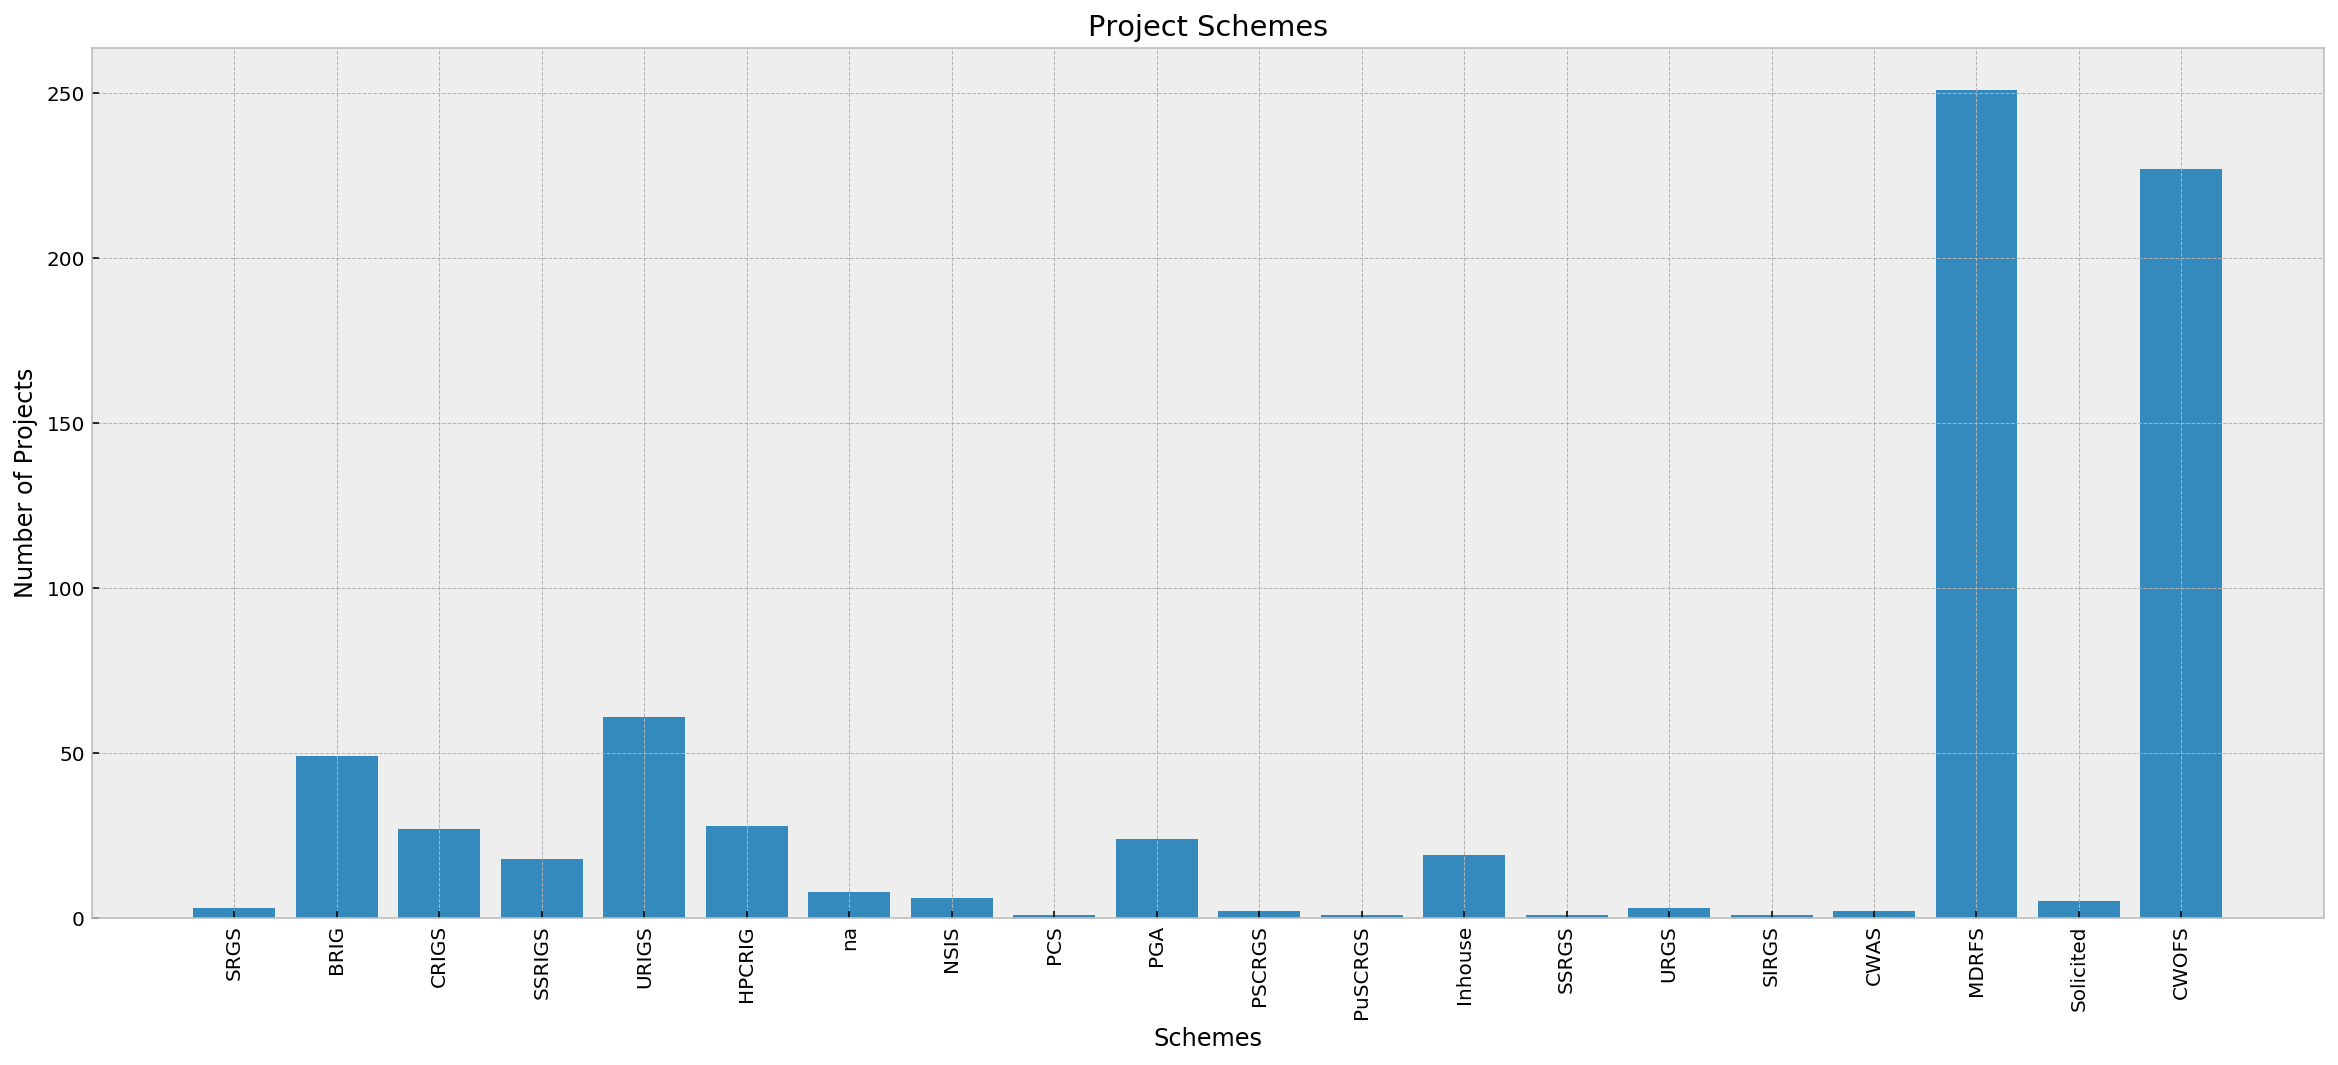

In [337]:
fig = plt.figure(figsize=(20,8))

plt.bar(dif, values,)
plt.xticks(rotation='vertical')

plt.ylabel('Number of Projects')
plt.xlabel('Schemes')
plt.title('Project Schemes')


In [252]:
themes = pd.value_counts(df_mrc['Thematic Classification'].values, sort=False)
len(themes)

140

<Figure size 432x288 with 0 Axes>

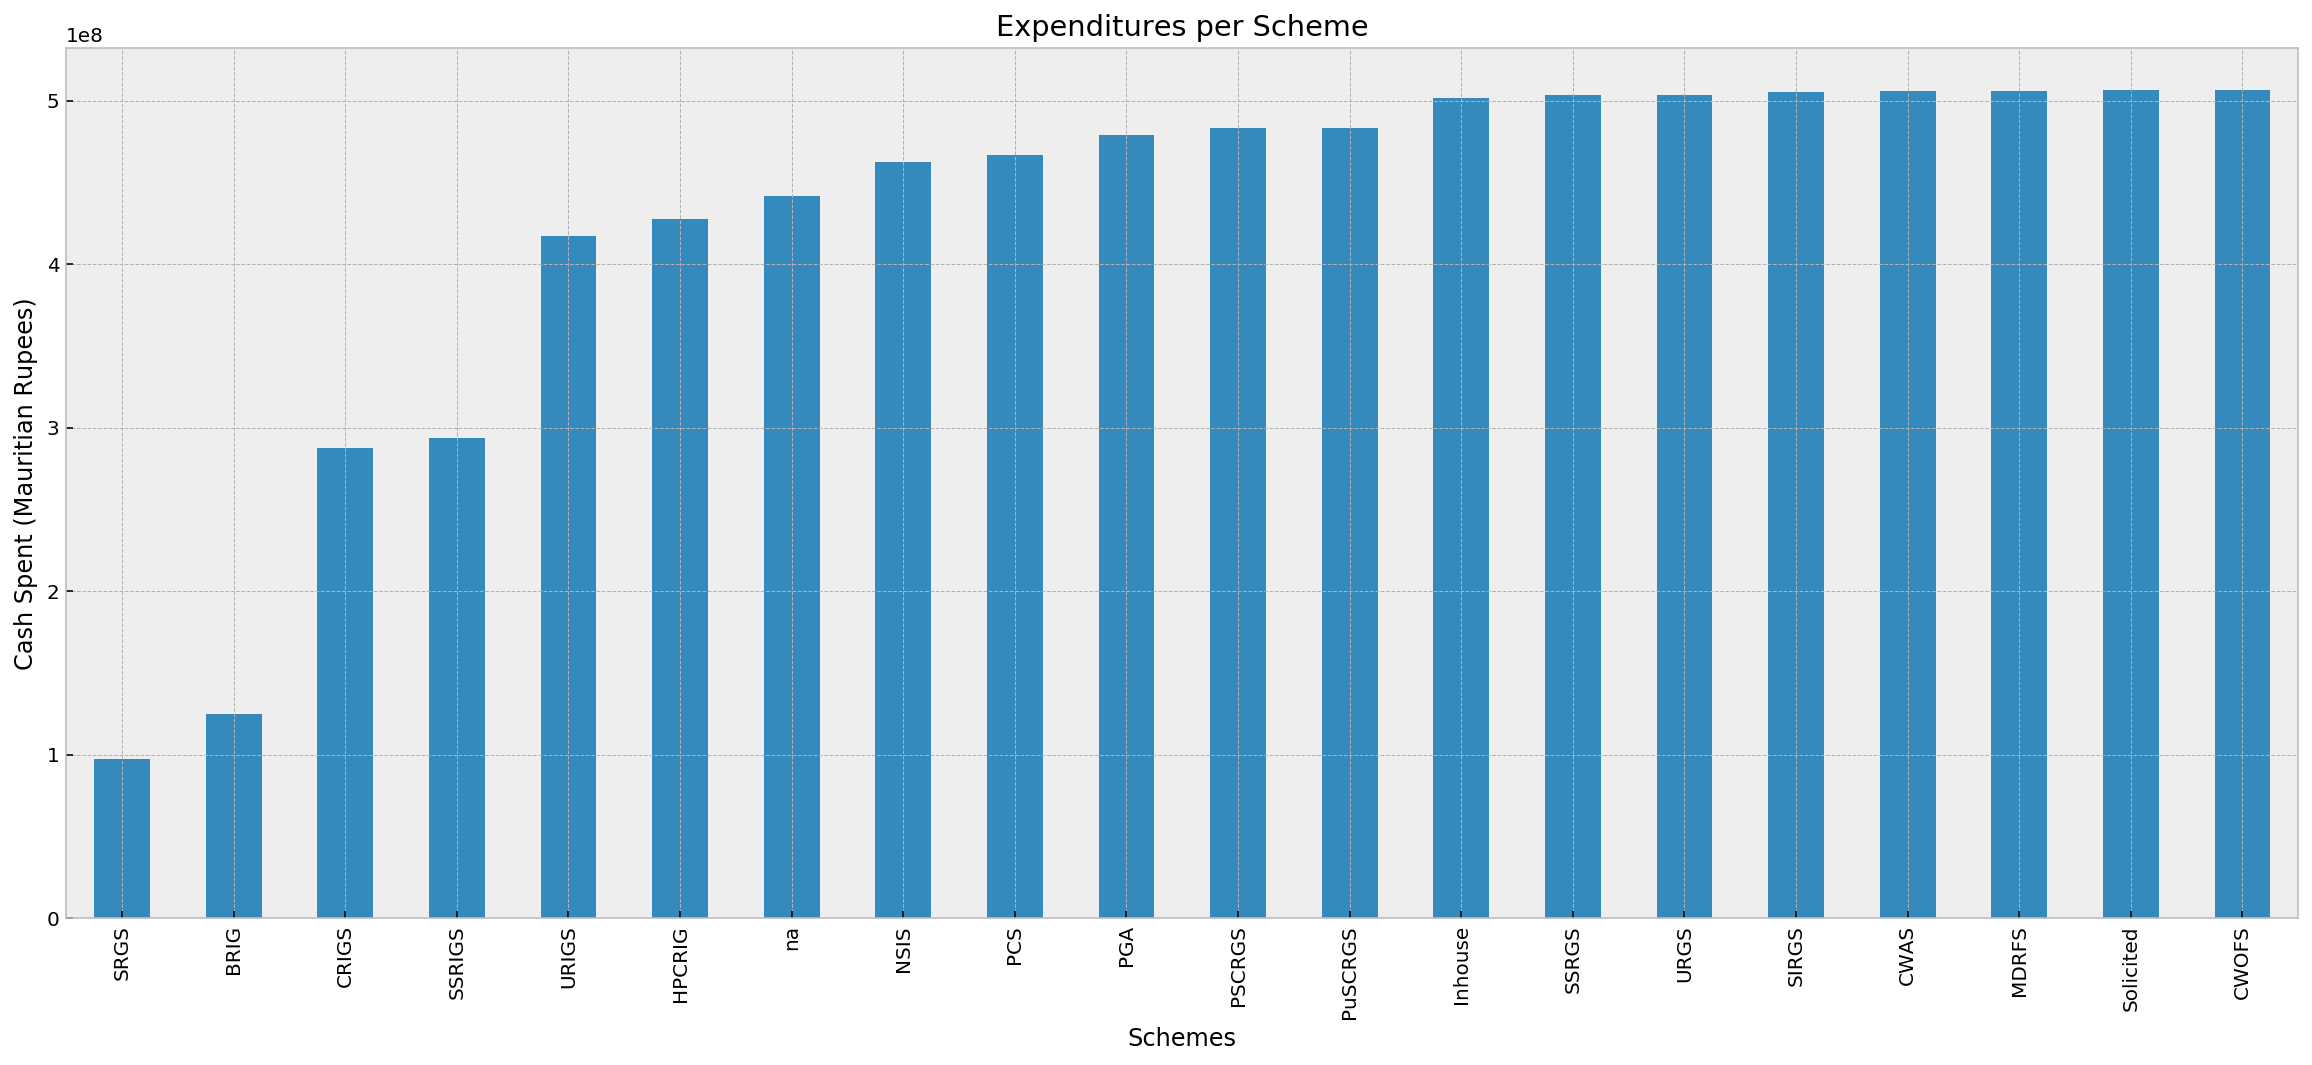

In [406]:
fig = plt.figure()
df_scheme_cash.plot(kind = 'bar', figsize=(20,8), legend = False)
plt.ylabel('Cash Spent (Mauritian Rupees)')
plt.xlabel('Schemes')
plt.title('Expenditures per Scheme')

for item in ax.get_yticklabels():
        yticks = item.get_text() 
ax.set_yticklabels(yticks, fontsize=30)
ax.yaxis.set_tick_params(pad=50)


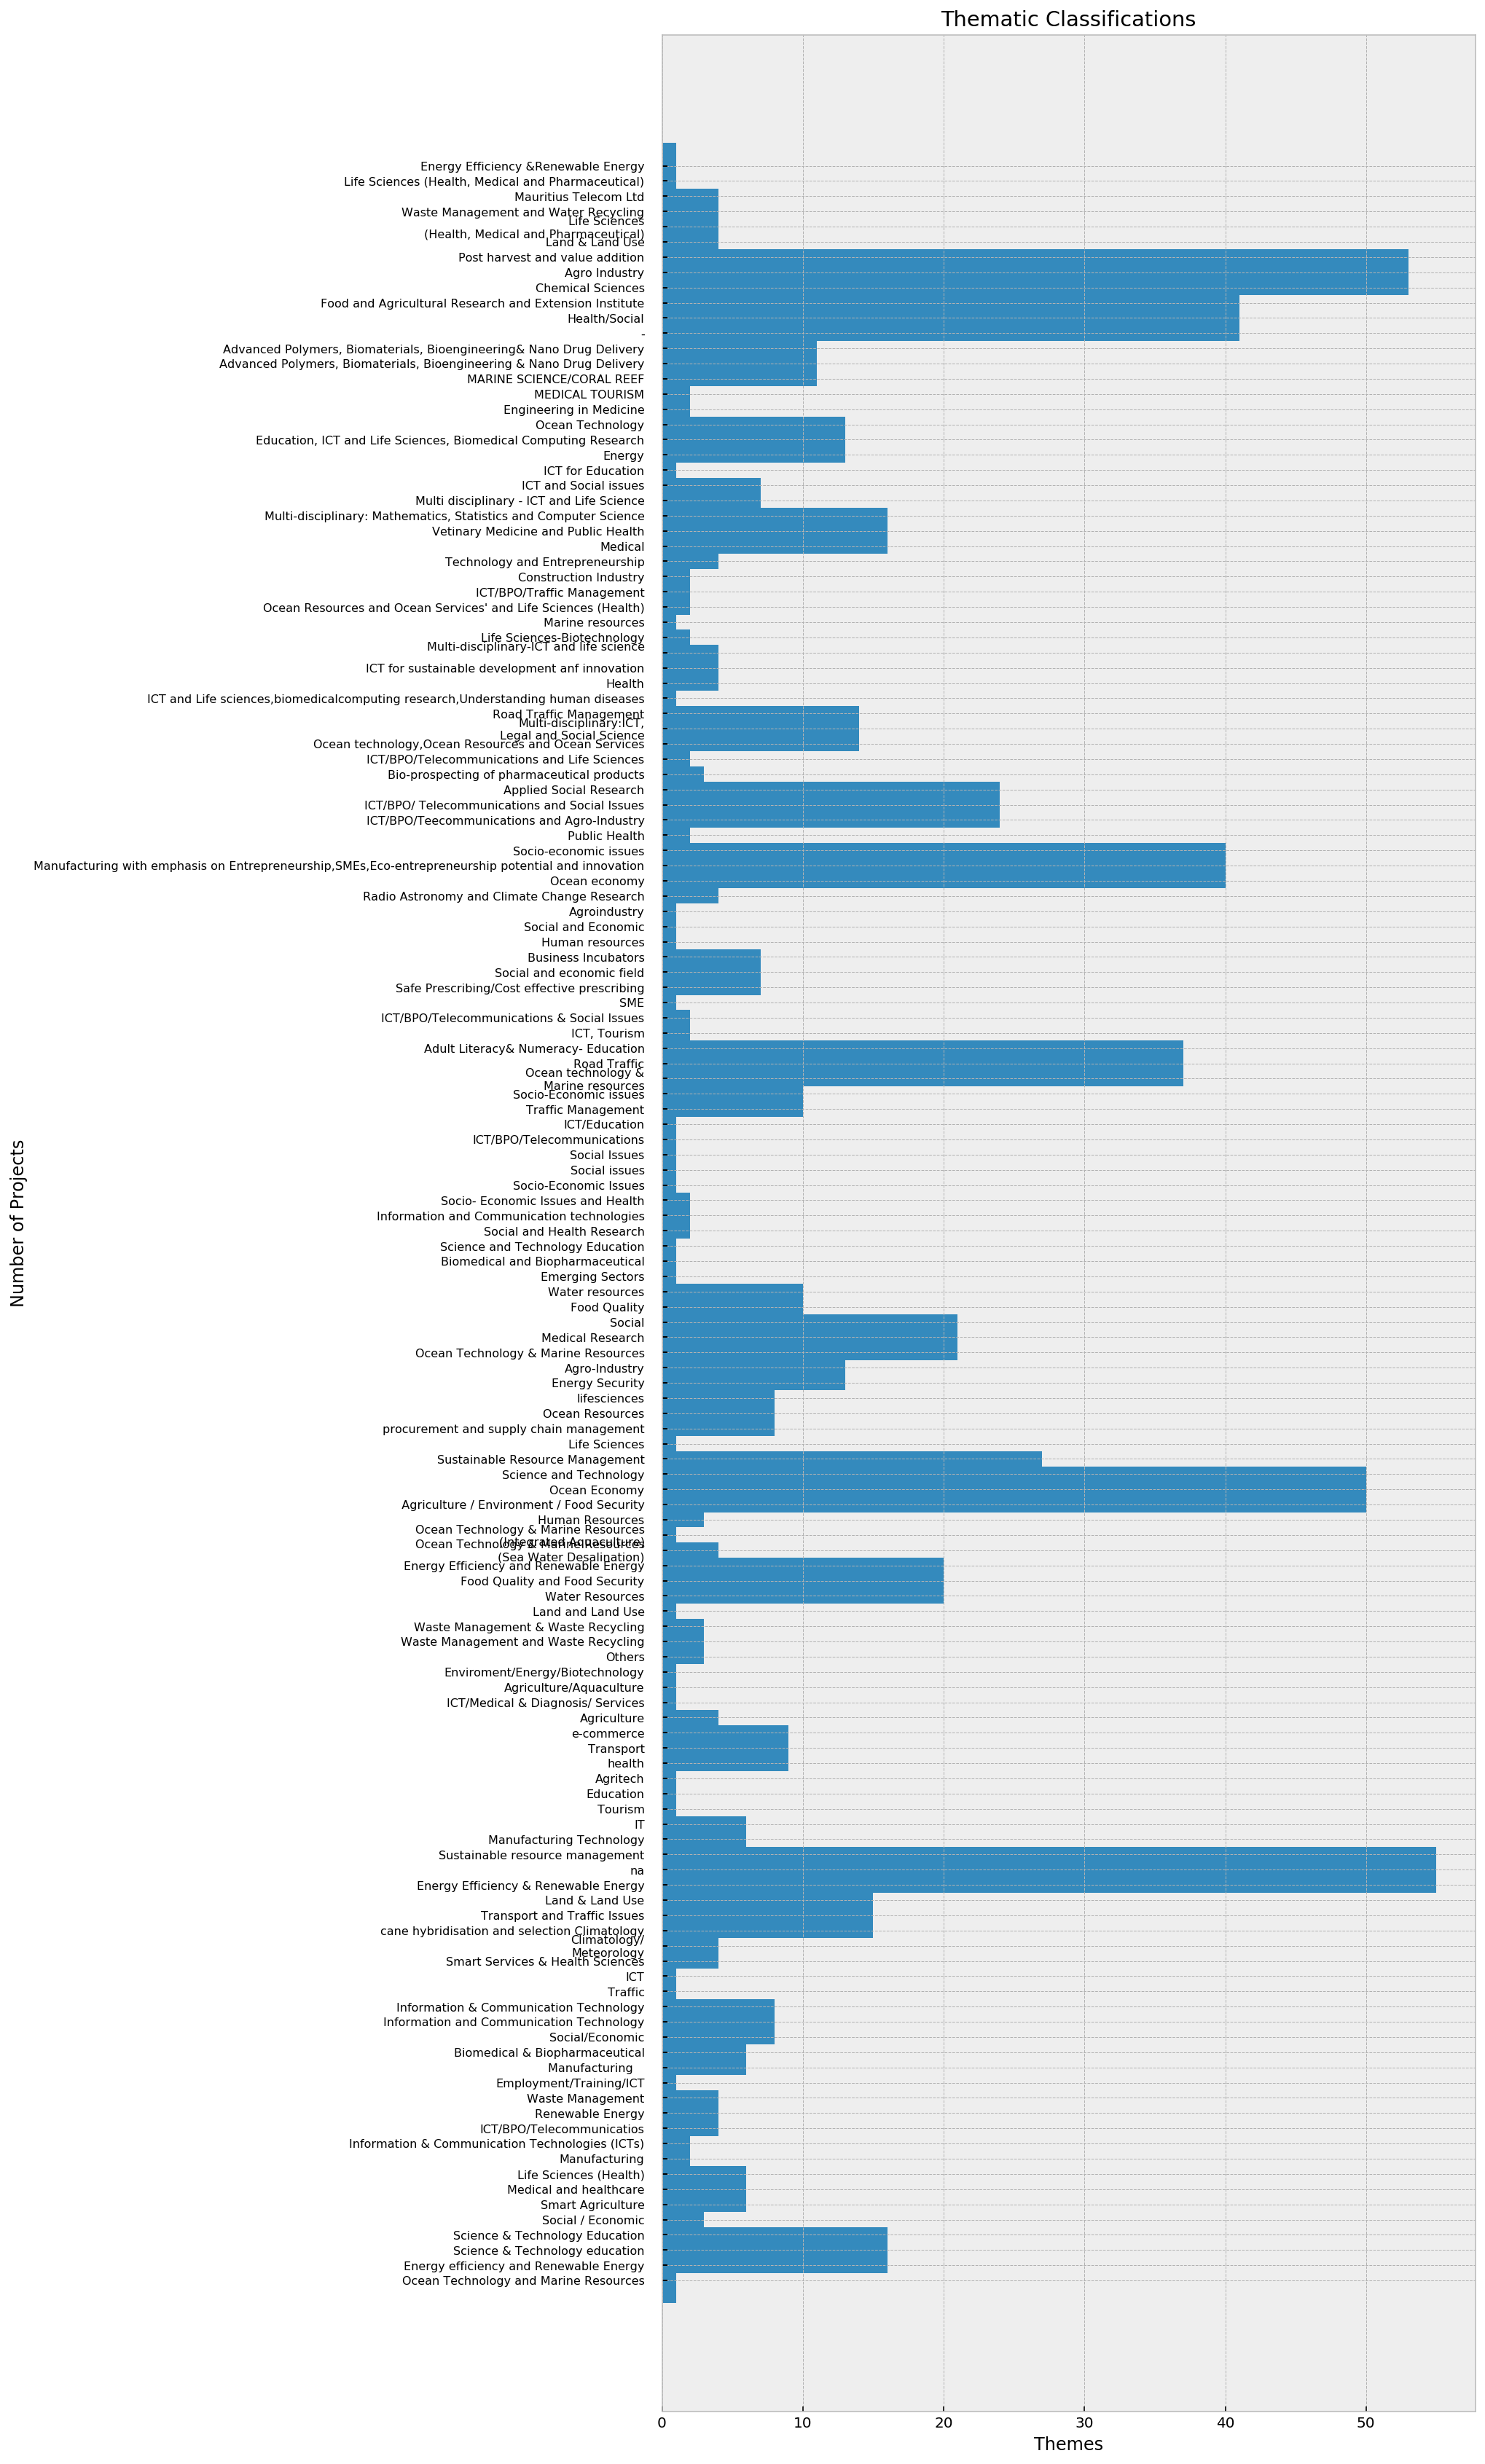

In [418]:
fig = plt.figure(figsize=(10,30))
ax = fig.add_subplot(111)

bar_height = 3

plt.barh(dif2, themes, height = bar_height)
#plt.xticks(rotation='vertical')



plt.ylabel('Number of Projects')
plt.xlabel('Themes')
plt.title('Thematic Classifications')

ax.yaxis.set_tick_params(width = 1, pad=12, labelsize = 8)

